In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#Load data
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
# 1. Prepare x, y

x = df[[  'CreditScore',  'Age', 'Tenure', 'Balance', 
        'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary']]

y = df['Exited']


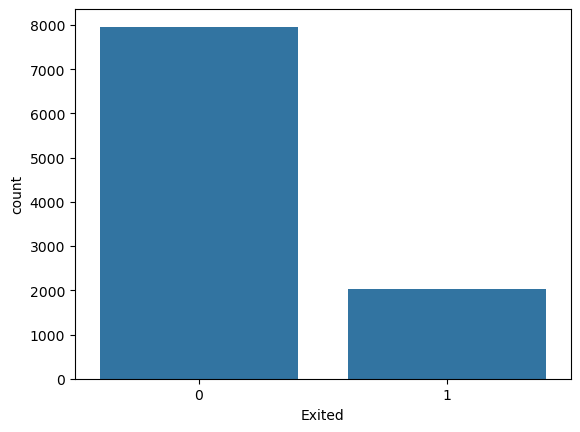

In [6]:
sns.countplot(x=y)
plt.show()

In [7]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)

In [10]:
x_res,y_res = ros.fit_resample(x,y)

In [11]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [12]:
# Normalize
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

In [13]:
x_scaled = Scaler.fit_transform(x_res)
x_scaled

array([[-0.29877723,  0.08418894, -1.01840607, ...,  0.6512495 ,
         1.08223556,  0.00817382],
       [-0.4103938 , -0.01032629, -1.36135608, ..., -1.53550983,
         1.08223556,  0.20261687],
       [-1.48597169,  0.08418894,  1.03929402, ...,  0.6512495 ,
        -0.92401325,  0.22674468],
       ...,
       [-0.84671313,  1.02934128,  0.01044398, ...,  0.6512495 ,
        -0.92401325,  1.28878188],
       [-0.96847667,  0.65128034, -0.67545605, ..., -1.53550983,
         1.08223556, -1.21851316],
       [-1.5874413 ,  0.74579558,  1.03929402, ...,  0.6512495 ,
         1.08223556,  1.42417217]])

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_res, test_size=0.25, random_state=0)


In [15]:
x_scaled.shape


(15926, 8)

In [16]:
x_train.shape

(11944, 8)

In [17]:
x_test.shape

(3982, 8)

In [18]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=(100,100,100), random_state=0, max_iter=100, activation= 'relu')

In [19]:
ann.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [20]:
y_pred = ann.predict(x_test)

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,accuracy_score

In [22]:
y_test.value_counts()

Exited
1    2001
0    1981
Name: count, dtype: int64

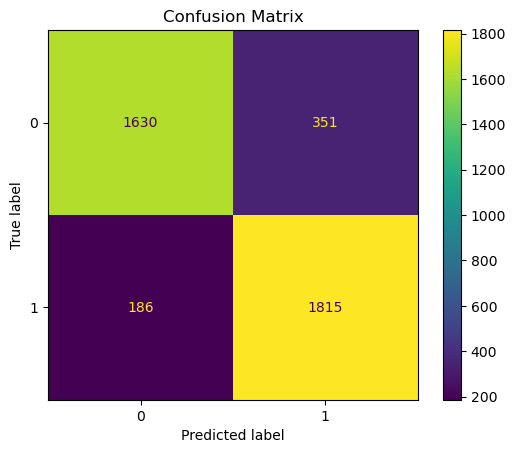

In [23]:

confusion_plot = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()


In [24]:
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.865143144148669

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1981
           1       0.84      0.91      0.87      2001

    accuracy                           0.87      3982
   macro avg       0.87      0.86      0.86      3982
weighted avg       0.87      0.87      0.86      3982

